<a href="https://colab.research.google.com/github/shannonlal/Statistical-YCBS-255/blob/main/Assignment02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2  <font color="blue"> (15 points) </font>
 
***

### General Instructions
  + You may need additional libraries besides the Python standard library to solve some questions. Import only necessary libraries. 
  + If more than one library exist for a same purpose, choose the one you wish as long as it does the task properly. 
  + If we want you to use a specific library, then we will state it clearly. 
  + Use the exact variable names asked in the questions. When no clear instructions given, feel free to do it the way you would like to.
  + After each question, add the needed number of new cells and place your answers inside the cells. 
  + Use text cells for explanations. Use explanation and plain text as much as possible. 
  + Do not remove or modify the original cells provided by the instructor.
  + In the following cell you will find some extra options to make your code more readable, including output colors RED, OKBLUE, or output text styles like BOLD or UNDERLINE that. Do not hesitate to use them. As an example, one may output text in red as follows: 
  ```python
     print(bcolors.RED + "your text" + bcolors.ENDC)
  ```
  + Comment your code whenever needed using # sign at the beginning of the row.
  + In some questions some of the details needed for solving the problem are **purposely** omitted to encourage additional self-directed research. This, especially, helps you develop some search skills for coding in Python (which is inevitable due to the inconsistent syntax of Python).
  + Do not hesitate to communicate your questions to the TA's or instructors. 
    
  Good luck! 

In [ ]:

# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Colorful outputs
class bcolors:
    RED       = '\033[91m'
    OKBLUE    = '\033[94m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC      = '\033[0m'

## **Part A** <font color="blue">(7 points)</font>

1. **<font color=blue> (1 point) </font>** Download `Credit.csv` from <http://faculty.marshall.usc.edu/gareth-james/ISL/data.html> and upload it into this notebook. Print the first $5$ rows of the data. Using appropriate descriptive statistics or visualization methods describe the variables and possible association amongst them. Interpret the results. 
2. **<font color=blue> (0.5 points)</font>** Keep only `Income`, `Limit`, `Rating`, `Cards`, `Age`, `Education`, and `Balance` as your variables and throw the rest of variables away. Print the dimension of this new dataset. 
3.  **<font color=blue> (0.5 points) </font>** Create a binary variable `Balance_1500` which equals $1$ for the observations with `Balance` $> 1500$, and equals $0$ otherwise.
4. **<font color=blue> (3 points) </font>** Model `Balance_1500` by the explanatory variables `Income`, `Limit`, `Rating`, `Cards`, `Age`, `Education` using the following models: 
    + logistic regression, 
    + linear discriminant, and 
    + quadratic discriminant.
8. **<font color=blue> (0.5 points) </font>** Find the probability of (`Balance` $> 1500$), for the following values, using all three aforementionned methods:

|    Income    |    Limit     |     Rating     |    Cards     |      Age        |   Education   | 
|--------------|--------------|----------------|--------------|-----------------|---------------|
|      63      |    8100      |     600        |      4       |       30        |      13       |
|     186      |    13414     |     950        |      2       |       41        |      13       |

</br>
Compare the probabilities and comment.
    
9. **<font color=blue> (1.5 points) </font>** For each method, print the confusion matrix, the accuracy score and the AUC using all observations. Compare these metrics and comment. 

In [ ]:
# Load Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [17]:
# Part A - Q1: Download Credit.csv from http://faculty.marshall.usc.edu/gareth-james/ISL/data.html and 
# upload it into this notebook.
from google.colab import files
uploaded = files.upload()

Saving ziptrain.csv to ziptrain.csv


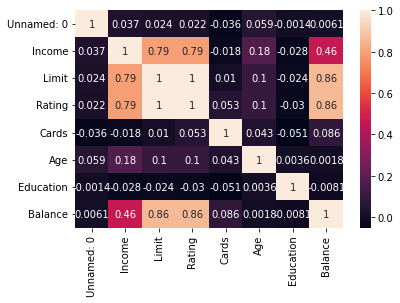

In [3]:
# Part A - Q1: Print the first  5  rows of the data. Using appropriate descriptive statistics or visualization methods 
# describe the variables and possible association amongst them. Interpret the results. Convert into a Panda
credit_data = pd.read_csv('Credit.csv')

# Display the first elements
credit_data.head()

# Describe the Data Set
credit_data.describe()

# Create a heat map and correlation matrix as discussed in Tutorial
corr_matrix = credit_data.corr()
sns.heatmap(corr_matrix, annot=True)
sns.set(rc = {'figure.figsize':(10,10)})
plt.show()

# Summary Note:
# When looking at the correlation matrix numbers that are close to 1 reference a high correlation between
# the variables.  Numbers less than .5 are indicative of not a strong relationship.  A - or + sign indicates
# that the direction of the corrolation.

# Based on the corrolation matrix below, we can see there is a strong relationship between balance, income and rating (0.86). 
# as well as between income and limit and rating.

In [4]:
# Part A: Q2 - Keep only Income, Limit, Rating, Cards, Age, Education, and Balance as your variables and throw the rest of variables away. 
# Print the dimension of this new dataset.

credit_data.drop('Unnamed: 0', axis=1, inplace=True)
credit_data.drop('Gender', axis=1, inplace=True)
credit_data.drop('Student', axis=1, inplace=True)
credit_data.drop('Married', axis=1, inplace=True)
credit_data.drop('Ethnicity', axis=1, inplace=True)

# List top 5 records
credit_data.head()

# Assert the shape is 400 rows and 7 columns
assert credit_data.shape == (400,7)

# Check if there are any null values in entire data frame
assert credit_data.isnull().values.any() == False

In [7]:
# Part A: Q3 - Create a binary variable Balance_1500 which equals  1  for the observations with Balance  >1500 , and equals  0  otherwise.

## Step 1: Create a function that determines the balance is high
## NOTE: TO TA.  I know this is verbose, but it is easy to read and it is testable
def balance_high(row):
  if row['Balance'] > 1500: 
    return 1
  else:
    return 0

# Test case for High Balance
df_test_1 = {'Balance':1501}
assert balance_high( df_test_1 ) == True
df_test_2 = {'Balance':1499}
assert balance_high( df_test_2 ) == False

## Step 2: Create a row called balance_1500 and apply the balance_high function.  Format data and print shape
credit_data['Balance_1500'] = credit_data.apply( balance_high, axis =1 )
credit_data = credit_data.astype({'Balance_1500': int})
print(credit_data.head())
print(credit_data.shape)

## Step 3: Count the number of credits above 1500
high_balance_count = 0
for balance_score in credit_data.Balance_1500:
  if balance_score == 1:
    high_balance_count+=1

print(bcolors.RED + "In the data set the percentage of applicants with a balance above 1500 is :" + bcolors.ENDC, (high_balance_count/ credit_data.count()*100)) 



    Income  Limit  Rating  Cards  Age  Education  Balance  Balance_1500
0   14.891   3606     283      2   34         11      333             0
1  106.025   6645     483      3   82         15      903             0
2  104.593   7075     514      4   71         11      580             0
3  148.924   9504     681      3   36         11      964             0
4   55.882   4897     357      2   68         16      331             0
(400, 8)
In the data set the percentage of applicants with a balance above 1500 is : Income          2.25
Limit           2.25
Rating          2.25
Cards           2.25
Age             2.25
Education       2.25
Balance         2.25
Balance_1500    2.25
dtype: float64


In [8]:
# Part A: Q4 - Prepare the data
from sklearn.metrics import confusion_matrix
X = credit_data[['Income','Limit','Rating','Cards','Age','Education']]
y = credit_data['Balance_1500']



In [9]:
# Part A: Q4 - Build Logistic Regression Model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=4000)
lr.fit(X, y)

print(bcolors.RED + "The Intercept for the Logistic Regression Model is :" + bcolors.ENDC, lr.intercept_) 
print(bcolors.RED + "The Coefficents for the Logistic Regression Model are :" + bcolors.ENDC, lr.coef_) 

LogisticRegression(max_iter=4000)

The Intercept for the Logistic Regression Model is : [-16.77144268]
The Coefficents for the Logistic Regression Model are : [[-0.08381135  0.00186085  0.01244322  0.11159392 -0.02029975 -0.07713963]]


In [10]:
# Part A: Q4 - Build Linear Discriminant Model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

print(bcolors.RED + "The Intercept for the Linear Discriminant Analysis Model is :" + bcolors.ENDC, lda.intercept_) 
print(bcolors.RED + "The Coefficents for the Linear Discriminant Analysis Model are :" + bcolors.ENDC, lda.coef_) 

LinearDiscriminantAnalysis()

The Intercept for the Linear Discriminant Analysis Model is : [-14.25754044]
The Coefficents for the Linear Discriminant Analysis Model are : [[ 2.50503328e-02 -2.46350024e-04  1.90771457e-02  2.92958512e-01
  -1.61624107e-02 -1.68504978e-02]]


In [11]:
# Part A: Q4 - Build Quadratic Discriminant Analysis Model
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(X, y)
 

QuadraticDiscriminantAnalysis()

In [12]:
# Part A: Q5 - Find the probability of (Balance  >1500 ), for the following values, Logistic Regression.  

sample_data = {'Income': [63, 186], 'Limit': [8100, 13414],'Rating': [600, 950], 'Cards': [4, 2],'Age': [30, 41], 'Education': [13, 13]}
sample_data_frame = pd.DataFrame(data=sample_data)

lr_prob_under_1500 = lr.predict_proba(sample_data_frame)
print(bcolors.RED + "Logistic Regression Predicted :" + bcolors.ENDC, lr_prob_under_1500) 

# [[0.66332506 0.33667494] -- First Individual.  66% the balance is under 1500 and 33% over 1500
# [0.05677163 0.94322837]] -- Second Indvidual. 5% the balance is under 1500 and 94% the balance over 1500

Logistic Regression Predicted : [[0.66332506 0.33667494]
 [0.05677163 0.94322837]]


In [14]:
# Part A: Q5 - Find the probability of (Balance  >1500 ), for the following values, Linear Discriminant Analysis  
lda_prob_under_1500 = lda.predict_proba(sample_data_frame)

print(bcolors.RED + "Linear Discriminant Analysis Predicted :" + bcolors.ENDC, lda_prob_under_1500) 

# [[0.94050988 0.05949012] -- First Individual.  94% the balance is under 1500 and 6% over 1500
# [0.00721199 0.99278801]] -- Second Indvidual. 1% the balance is under 1500 and 99% the balance over 1500

Linear Discriminant Analysis Predicted : [[0.94050988 0.05949012]
 [0.00721199 0.99278801]]


In [39]:
# Part A: Q5 - Find the probability of (Balance  >1500 ), for the following values, Quadratic Discriminant Analysis 
qda_prob_under_1500 = qda.predict_proba(sample_data_frame)

print(bcolors.RED + "Quadratic Discriminant Analysis Predicted :" + bcolors.ENDC, qda_prob_under_1500) 


Logistic Regression Predicted : [[9.99999995e-01 4.93626009e-09]
 [7.83057752e-04 9.99216942e-01]]


In [43]:
# Part A: Q9 - For each method, print the confusion matrix, the accuracy score and the AUC using all observations. Compare these metrics and comment.

## Logistic Regression
lr_y_predicted = lr.predict( X )
print(bcolors.RED + "\n LR Confusion Matrix: " + bcolors.ENDC, confusion_matrix(y, lr_y_predicted)) 
print(bcolors.RED + "\n LR Accuracy: " + bcolors.ENDC, accuracy_score(y, lr_y_predicted)) 
print(bcolors.RED + "\n LR Area Under the Curve (AUC): " + bcolors.ENDC, roc_auc_score(y,lr_y_predicted))

## Linear Discriminant Analysis 
lda_y_predicted = lda.predict( X )
print(bcolors.RED + "\n LDA Confusion Matrix: " + bcolors.ENDC, confusion_matrix(y, lda_y_predicted)) 
print(bcolors.RED + "\n LDA Accuracy: " + bcolors.ENDC, accuracy_score(y, lda_y_predicted)) 
print(bcolors.RED + "\n LDA Area Under the Curve (AUC): " + bcolors.ENDC, roc_auc_score(y,lda_y_predicted))


## Quadratic Discriminant Analysis
qda_y_predicted = qda.predict( X )
print(bcolors.RED + "\n QDA Confusion Matrix: " + bcolors.ENDC, confusion_matrix(y, qda_y_predicted)) 
print(bcolors.RED + "\n QDA Accuracy: " + bcolors.ENDC, accuracy_score(y, qda_y_predicted)) 
print(bcolors.RED + "\n QDA Area Under the Curve (AUC): " + bcolors.ENDC, roc_auc_score(y,qda_y_predicted))


 LR Confusion Matrix:  [[391   0]
 [  3   6]]

 LR Accuracy:  0.9925

 LR Area Under the Curve (AUC):  0.8333333333333333

 LDA Confusion Matrix:  [[383   8]
 [  4   5]]

 LDA Accuracy:  0.97

 LDA Area Under the Curve (AUC):  0.7675475987496447

 QDA Confusion Matrix:  [[390   1]
 [  2   7]]

 QDA Accuracy:  0.9925

 QDA Area Under the Curve (AUC):  0.8876101165103721


In [ ]:
# Part A: Q9 - Summary

# When we compare the confusion matrix between LR, LDA and QDA we can see that we get similar results for Logistic Regression
# and Quadritic Analysis with low False Negative and False Positives; however, Linear Discrement Analysis has a slightly higher 
# False and Negative rate.  When we compare our Accuracy we can see that we are getting almost identical accuracy for Logistic 
# Regression and QDA; however, our LDA is a slightly lower with 97% versus 99.25% for QDA and LR.  The key determining seems to 
# be AUC.  We know that a higher AUC means a better model, and comparing the AUC we get 88% for QDA.


## **Part B** <font color="blue">(8 points)</font>

Donwload  `ziptrain.csv` and `ziptest.csv` datasets from  **Athena/Content/Data**. Save them and upload them here as **two separate datasets** and name them `ziptrain` and `ziptest`, respectively. Explore the data in order to understand it. 

  1. **<font color="blue">(1 point)</font>** From `ziptrain` dataset select only the rows corresponding to digits $2$ and $7$ and save them in a new dataset called `binar_train`. Do the same thing in `ziptest` and call it `binar_test`. 
  2. **<font color="blue">(1 point)</font>** Project `binar_train` onto the first **two principal components** and make a scatterplot of the data in the new space (two-dimensional space spanned by the frist two PCs). Use a different color (or marker) for each digit. Based on the plot do you think that these two digits can be separated well using only two PCs? Explain.
  3. **<font color="blue">(1 point)</font>** Fit a **logistic regression**, in the new space, to separate digits $2$ and $7$. 
  4. **<font color="blue">(1 point)</font>** Evaluate the trainded model on `binar_test` using **accuracy**, and an **appropriate F-measure**. 
  5. **<font color="blue">(0.5 points)</font>** Build and print a confusion matrix for your predictions.

For the rest of the questions use the **whole training data**, i.e., `ziptrain` (**not** `binar_train`). 

  6. **<font color="blue">(1 point)</font>** Project the whole data onto the first $m=2, 3, 4, 5$ principal components (one $m$ at a time).
  7. **<font color="blue">(1.5 points)</font>** For each $m$, and using **$5$-fold cross-validation**, train a **linear discriminant** classifier on `ziptrain`. 
  8. **<font color="blue">(1 point)</font>** Based on **cross-validated accuracy**, select the best number of principal components $m$.


In [ ]:
# Load the sample ziptrain into the jupiter
from google.colab import files
uploaded = files.upload()

In [45]:
# Load the train data and remove excess data
from os import strerror
# Convert into a Panda
ziptrain = pd.read_csv('ziptrain.csv', delimiter=' ', header=None)

ziptrain.rename( columns={0: 'label'}, inplace=True)
ziptrain['label'] = pd.to_numeric( ziptrain['label'], downcast='integer')
ziptrain.drop(ziptrain.columns[257], axis=1, inplace=True)

ziptrain.head()
ziptrain.shape
ziptrain.count
ziptrain.dtypes


,label,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256
0,6,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,-0.167,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.992,0.297,1.000,0.307,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.410,...,1.000,1.000,1.000,1.000,0.135,-1.0,-1.000,-1.000,-1.0,-1.000,-1.000,-0.483,0.813,1.0,1.000,1.0,1.000,1.000,1.0,0.219,-0.943,-1.000,-1.000,-1.00,-1.0,-1.0,-1.0,-1.000,-0.974,-0.429,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,5,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,-1.000,-1.000,-0.774,-0.180,0.052,-0.241,-1.0,-1.0,-1.0,-1.0,0.392,1.000,0.857,0.727,1.000,0.805,0.613,0.613,0.860,1.000,1.000,0.396,-1.0,-1.0,-1.0,-1.0,-0.548,1.000,1.000,1.000,...,0.970,0.970,0.970,0.998,1.000,1.0,1.000,0.109,-1.0,-1.000,-0.830,-0.242,0.350,0.8,1.000,1.0,1.000,1.000,1.0,1.000,1.000,1.000,0.616,-0.93,-1.0,-1.0,-1.0,-1.000,-1.000,-0.858,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,4,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.996,0.147,1.000,-0.189,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.882,1.000,0.390,-0.811,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,...,-1.000,-0.426,1.000,0.555,-1.000,-1.0,-1.000,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.0,-1.000,-1.0,-1.000,0.024,1.0,0.388,-1.000,-1.000,-1.000,-1.00,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,7,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,-0.067,-0.679,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-0.114,0.974,0.917,0.734,0.994,1.000,0.973,0.391,-0.421,-0.976,-1.000,-1.0,-1.0,-1.0,-1.0,-0.323,0.991,0.622,-0.738,...,0.432,-1.000,-1.000,-1.000,-1.000,-1.0,-1.000,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.0,-0.348,1.0,0.798,-0.935,-1.0,-1.000,-1.000,-1.000,-1.000,-1.00,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,3,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,0.234,-0.809,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-0.370,0.739,1.000,1.000,1.000,1.000,0.644,-0.890,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,0.616,1.000,0.688,...,-0.733,-0.733,-0.733,-0.433,0.649,1.0,0.093,-1.000,-1.0,-0.959,-0.062,0.821,1.000,1.0,1.000,1.0,1.000,1.000,1.0,1.000,1.000,0.583,-0.843,-1.00,-1.0,-1.0,-1.0,-0.877,-0.326,0.174,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0


(7291, 257)

<bound method DataFrame.count of       label    1    2    3      4  ...    252    253    254    255  256
0         6 -1.0 -1.0 -1.0 -1.000  ... -0.991 -1.000 -1.000 -1.000 -1.0
1         5 -1.0 -1.0 -1.0 -0.813  ...  0.126 -0.095 -0.671 -0.828 -1.0
2         4 -1.0 -1.0 -1.0 -1.000  ... -0.179 -1.000 -1.000 -1.000 -1.0
3         7 -1.0 -1.0 -1.0 -1.000  ... -1.000 -1.000 -1.000 -1.000 -1.0
4         3 -1.0 -1.0 -1.0 -1.000  ...  0.439 -0.199 -0.883 -1.000 -1.0
...     ...  ...  ...  ...    ...  ...    ...    ...    ...    ...  ...
7286      3 -1.0 -1.0 -1.0 -0.988  ... -1.000 -1.000 -1.000 -1.000 -1.0
7287      3 -1.0 -1.0 -1.0 -0.990  ... -1.000 -1.000 -1.000 -1.000 -1.0
7288      3 -1.0 -1.0 -1.0 -0.783  ... -0.933 -1.000 -1.000 -1.000 -1.0
7289      0 -1.0 -1.0 -1.0 -1.000  ... -0.687 -1.000 -1.000 -1.000 -1.0
7290      1 -1.0 -1.0 -1.0 -1.000  ... -1.000 -1.000 -1.000 -1.000 -1.0

[7291 rows x 257 columns]>

label       int8
1        float64
2        float64
3        float64
4        float64
          ...   
252      float64
253      float64
254      float64
255      float64
256      float64
Length: 257, dtype: object

In [46]:
# Load the sample ziptest into the jupiter notebook
from google.colab import files
uploaded = files.upload()

Saving ziptest.csv to ziptest.csv


In [47]:
# Load the test data and remove excess data
from os import strerror
# Convert into a Panda
ziptest = pd.read_csv('ziptest.csv', delimiter=' ', header=None)

ziptest.rename( columns={0: 'label'}, inplace=True)
ziptest['label'] = pd.to_numeric( ziptest['label'], downcast='integer')

ziptest.head()
ziptest.shape
ziptest.count
ziptest.dtypes

,label,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256
0,9,-1.0,-1.0,-1.0,-1.000,-1.0,-0.948,-0.561,0.148,0.384,0.904,0.290,-0.782,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.748,0.588,1.000,1.000,0.991,0.915,1.000,0.931,-0.476,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-0.787,0.794,1.000,0.727,...,0.998,0.841,-0.932,-1.000,-1.0,-1.000,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.424,1.0,0.732,-1.0,-1.00,-1.000,-1.000,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.908,0.430,0.622,-0.973,-1.000,-1.0,-1.0,-1.0,-1.0
1,6,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.783,-0.973,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.364,0.789,-0.371,...,0.774,0.774,0.302,-0.522,-1.0,-1.000,-1.000,-1.0,-1.000,-1.000,-1.000,-0.663,-0.606,-0.606,-0.606,-0.688,-1.0,-1.000,-1.0,-1.00,-1.000,-1.000,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
2,3,-1.0,-1.0,-1.0,-0.593,0.7,1.000,1.000,1.000,1.000,0.853,0.075,-0.925,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.553,0.998,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.961,-0.076,-0.999,-1.0,-1.0,-1.0,-1.0,0.228,1.000,0.849,-0.150,-0.705,...,0.389,1.000,1.000,1.000,1.0,0.497,-1.000,-1.0,-1.000,-1.000,0.507,1.000,1.000,1.000,1.000,1.000,1.0,1.000,1.0,0.83,0.053,-0.946,-1.0,-1.0,-1.0,-1.000,-0.941,0.059,0.615,1.000,1.000,0.717,0.333,0.162,-0.393,-1.000,-1.0,-1.0,-1.0,-1.0
3,6,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.417,-0.330,...,-0.021,-0.182,-0.648,-0.780,-1.0,-1.000,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.000,-1.0,-1.00,-1.000,-1.000,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
4,6,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-0.858,-0.106,0.802,-0.210,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.854,0.597,1.000,0.798,-0.388,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.481,0.600,...,0.142,-0.584,0.075,0.833,1.0,0.123,-0.963,-1.0,-0.537,0.896,1.000,1.000,1.000,1.000,1.000,1.000,1.0,1.000,1.0,0.83,-0.387,-0.976,-1.0,-1.0,-1.0,-0.697,-0.108,0.312,0.901,0.901,0.901,0.901,0.901,0.290,-0.369,-0.867,-1.0,-1.0,-1.0,-1.0


(2007, 257)

<bound method DataFrame.count of       label    1    2    3      4      5  ...    251    252  253  254  255  256
0         9 -1.0 -1.0 -1.0 -1.000 -1.000  ... -0.973 -1.000 -1.0 -1.0 -1.0 -1.0
1         6 -1.0 -1.0 -1.0 -1.000 -1.000  ... -1.000 -1.000 -1.0 -1.0 -1.0 -1.0
2         3 -1.0 -1.0 -1.0 -0.593  0.700  ... -0.393 -1.000 -1.0 -1.0 -1.0 -1.0
3         6 -1.0 -1.0 -1.0 -1.000 -1.000  ... -1.000 -1.000 -1.0 -1.0 -1.0 -1.0
4         6 -1.0 -1.0 -1.0 -1.000 -1.000  ... -0.369 -0.867 -1.0 -1.0 -1.0 -1.0
...     ...  ...  ...  ...    ...    ...  ...    ...    ...  ...  ...  ...  ...
2002      3 -1.0 -1.0 -1.0 -1.000 -1.000  ... -0.484 -1.000 -1.0 -1.0 -1.0 -1.0
2003      9 -1.0 -1.0 -1.0 -1.000 -1.000  ... -1.000 -1.000 -1.0 -1.0 -1.0 -1.0
2004      4 -1.0 -1.0 -1.0 -1.000 -0.031  ... -1.000 -1.000 -1.0 -1.0 -1.0 -1.0
2005      0 -1.0 -1.0 -1.0 -1.000 -0.534  ... -0.975 -1.000 -1.0 -1.0 -1.0 -1.0
2006      1 -1.0 -1.0 -1.0 -1.000 -1.000  ... -0.950 -1.000 -1.0 -1.0 -1.0 -1.0

[2007 

label       int8
1        float64
2        float64
3        float64
4        float64
          ...   
252      float64
253      float64
254      float64
255      float64
256      float64
Length: 257, dtype: object

In [49]:
# Part B Question 1
# From ziptrain dataset select only the rows corresponding to digits  2  and  7  and save them in a new dataset called binar_train. 
# Do the same thing in ziptest and call it binar_test.
binar_train = ziptrain.loc[ (ziptrain['label'] == 2) | (ziptrain['label'] == 7)]
binar_train.head()

binar_test = ziptest.loc[ (ziptest['label']== 2) | (ziptest['label'] == 7 )]
binar_test.head()

,label,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256
3,7,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,-0.067,-0.679,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.00,-0.114,0.974,0.917,0.734,0.994,1.000,0.973,0.391,-0.421,-0.976,-1.000,-1.0,-1.0,-1.0,-1.0,-0.323,0.991,0.622,-0.738,...,0.432,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-0.348,1.000,0.798,-0.935,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-0.318,1.000,0.536,-0.987,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
10,7,-1.0,-1.0,-1.0,-1.000,-1.000,-0.596,0.912,1.000,0.290,-0.673,0.245,0.899,0.814,-0.450,-1.000,-1.0,-1.0,-1.0,-1.0,-1.00,-0.973,0.563,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.939,-0.741,-1.0,-1.0,-1.0,-1.0,-1.000,-0.240,1.000,1.000,...,0.617,0.956,-0.706,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.673,0.964,0.959,-0.835,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.795,0.663,-0.074,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
14,7,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-0.632,0.632,0.740,-0.865,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.00,-1.000,-1.000,-1.000,-0.096,0.970,0.959,0.994,-0.018,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.418,...,0.622,0.643,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.884,0.954,0.385,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.967,0.866,-0.001,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
15,7,-1.0,-1.0,-1.0,-0.929,0.351,0.798,0.806,0.114,0.015,-0.479,-0.925,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-0.88,0.901,1.000,1.000,1.000,1.000,1.000,0.853,-0.109,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,0.786,1.000,0.252,...,0.282,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.394,1.000,1.000,-0.421,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.648,0.835,-0.086,-0.991,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
22,7,-1.0,-1.0,-1.0,-1.000,-0.869,0.777,-0.007,-0.697,-1.000,-1.000,-1.000,-1.000,-0.843,0.417,-0.806,-1.0,-1.0,-1.0,-1.0,-1.00,0.212,1.000,1.000,0.996,0.975,0.683,0.226,0.164,0.531,1.000,-0.231,-1.0,-1.0,-1.0,-1.0,-0.315,0.996,0.833,0.266,...,0.975,-0.251,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-0.981,0.785,0.586,-0.996,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-0.933,0.667,-0.315,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


,label,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256
11,2,-0.996,0.572,0.396,0.063,-0.506,-0.847,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.391,0.974,1.000,1.000,0.954,0.356,-0.470,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.716,-0.170,0.307,0.851,1.000,...,0.940,0.030,-1.000,-1.0,-0.749,-0.016,0.040,-0.996,-1.0,0.554,1.000,1.000,1.000,1.000,0.791,0.325,-0.673,-1.000,-1.000,-1.000,-1.000,-1.000,-1.00,-1.000,-1.0,-0.605,0.718,0.972,0.398,0.165,-0.668,-1.0,-1.0,-1.00,-1.00,-1.000,-1.000,-1.000,-1.000,-1.000
12,2,-1.000,-1.000,0.469,0.413,1.000,1.000,0.462,-0.116,-0.937,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-0.393,0.822,0.840,0.996,1.000,1.000,0.697,-0.597,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.567,-0.405,...,0.828,0.760,0.951,1.0,1.000,-0.243,-1.000,-1.000,-1.0,-0.999,0.432,1.000,1.000,0.973,0.925,1.000,1.000,1.000,1.000,0.793,-0.136,-0.969,-1.00,-1.000,-1.0,-1.000,-0.979,-0.114,0.552,1.000,1.000,1.0,1.0,0.27,-0.28,-0.855,-1.000,-1.000,-1.000,-1.000
20,2,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.969,-0.286,0.487,0.934,0.856,-0.269,-0.869,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-0.719,0.612,0.996,1.000,...,-0.753,0.348,0.909,1.0,1.000,1.000,1.000,0.448,-1.0,-1.000,-1.000,-0.634,0.325,0.593,-0.245,-1.000,-1.000,-1.000,-0.735,0.000,0.160,0.160,-0.38,-0.867,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.00,-1.00,-1.000,-1.000,-1.000,-1.000,-1.000
21,2,-1.000,-1.000,-1.000,-0.831,0.047,0.140,0.947,0.813,0.012,-0.768,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-0.563,0.715,1.000,1.000,1.000,1.000,1.000,0.976,0.039,-0.905,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.056,1.000,1.000,1.000,1.000,...,0.675,0.929,1.000,1.0,1.000,1.000,0.938,-0.286,-1.0,-0.196,1.000,1.000,1.000,1.000,0.066,-0.914,-1.000,-0.634,0.097,0.763,1.000,1.000,1.00,0.338,-1.0,-0.996,0.226,1.000,0.936,-0.221,-0.915,-1.0,-1.0,-1.00,-1.00,-0.866,-0.672,0.131,0.135,-0.318
25,2,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.665,0.603,1.000,0.646,-0.836,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.232,0.848,0.915,0.585,1.000,0.683,-0.799,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,0.293,1.000,0.613,...,1.000,0.638,-0.014,1.0,0.995,-0.611,-1.000,-1.000,-1.0,-1.000,-1.000,-0.305,0.722,1.000,0.652,0.398,-0.232,-0.986,-0.582,1.000,1.000,-0.543,-1.00,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.00,-1.00,0.720,0.711,-0.932,-1.000,-1.000



 Explained Variance Ratio:  [0.15752934 0.07172628]


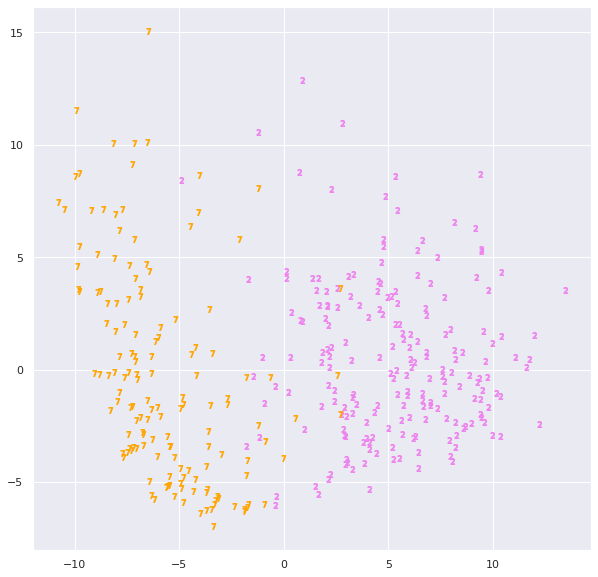

In [54]:
# Part B: Question 2
# Project binar_train onto the first two principal components and make a scatterplot of the data in the new space 
# (two-dimensional space spanned by the frist two PCs). Use a different color (or marker) for each digit. 
# Based on the plot do you think that these two digits can be separated well using only two PCs? Explain.

pca = PCA(n_components=2)

y_train = binar_train['label']
#x_train = binar_train.loc[:, binar_train.columns !='label']
x_train = binar_train.drop('label', axis =1)

y_test = binar_test['label']
x_test = binar_test.drop('label', axis = 1)

# Step 1. Scale the data using standard scalar.  Recommended by TA during Lession 6 session
scalar = StandardScaler()

# TA in session recommended fit_transform as opposed to workbook 5
x_traning_scalar = scalar.fit_transform( x_train)
x_test_scalar = scalar.transform( x_test )

x_train_pca = pca.fit_transform(x_traning_scalar)
Z = pca.transform( x_test_scalar )

## TODO Explain this.  Need to explain how this works and what it means
print(bcolors.RED + "\n Explained Variance Ratio: " + bcolors.ENDC, pca.explained_variance_ratio_) 
# y_test
plt.scatter(Z[y_test==2,0], Z[y_test==2,1], marker='$2$', 
            color='violet', alpha = 0.9);

plt.scatter(Z[y_test==7,0], Z[y_test==7,1], marker='$7$', 
            color='orange', alpha = 0.9);





In [59]:
# Part B: Question 3
# Fit a logistic regression, in the new space, to separate digits  2  and  7 .
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(x_train_pca, y_train)

print(bcolors.RED + "The Coefficents for the Logistic Regression in the new space:" + bcolors.ENDC, logreg.coef_) 
print(bcolors.RED + "The Intercept for the Logistic Regression in the new space:" + bcolors.ENDC, logreg.intercept_)

LogisticRegression(solver='liblinear')

The Coefficents for the Logistic Regression in the new space: [[-1.12394627 -0.11047621]]
The Intercept for the Logistic Regression in the new space: [-1.21932323]


In [61]:
#Part B Question 4: Evaluate the trainded model on binar_test using accuracy, and an appropriate F-measure
y_test = binar_test['label']
x_test = binar_test.loc[:, binar_train.columns !='label']
y_predict = logreg.predict( Z )

print(bcolors.RED + "\n Accuracy Score: " + bcolors.ENDC, accuracy_score(y_test, y_predict))

## Note: Reviewed with TA During office hours
print(bcolors.RED + "\n F-Score: " + bcolors.ENDC, f1_score( y_test, y_predict, labels=[2,7], pos_label=7)) 

## TODO.  Comment on Accuracy and F-Score 



 Accuracy Score:  0.9652173913043478

 F-Score:  0.9589041095890412


In [62]:
#Part B Question 5: Build and print a confusion matrix for your predictions.

conf_matrix = confusion_matrix(y_test, y_predict)

print(bcolors.RED + "\n Conusion Matrix: " + bcolors.ENDC, conf_matrix) 




 Conusion Matrix:  0.9589041095890412


In [66]:
# Part B Q  6: Project the whole data onto the first  𝑚=2,3,4,5  principal components (one  𝑚  at a time).
# Part B - Q 7: For each  𝑚 , and using  5 -fold cross-validation, train a linear discriminant classifier on ziptrain.

def project_onto_pca( m, x_training_scalar, x_test_scalar, y_train, y_test ):
  pca = PCA( n_components=m )

  x_train_pca = pca.fit_transform(x_training_scalar)
  z = pca.transform( x_test_scalar )

  lda = LinearDiscriminantAnalysis()
  lda.fit( x_train_pca, y_train)

  # TO Confirm is this correct variables
  accuracy_cv_m2 = cross_val_score(lda, x_train_pca, y_test, cv=5)

  return accuracy_cv_m2

whole_scalar = StandardScaler()
y_train_label_whole = ziptrain['label']
x_train_whole = ziptrain.drop('label', axis =1)
y_test_label_whole = ziptest['label']
x_test_whole = ziptest.drop('label', axis =1)

x_train_whole_scalar = whole_scalar.fit_transform( x_train_whole )
x_test_whole_scalar = whole_scalar.transform( x_test_whole )

pca_accuracy = []
for i in range( 2, 5):
  accuracy = project_onto_pca( i,x_train_whole_scalar,x_test_whole_scalar, y_train_label_whole, y_test_label_whole)
  print(bcolors.RED + "\n Conusion Matrix: " + bcolors.ENDC, accuracy)


ValueError: ignored

In [ ]:
# Part B - Q 8: For each  𝑚 , and using  5 -fold cross-validation, train a linear discriminant classifier on ziptrain.